In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

   Unnamed: 0 agent  capacity dst_region  index  installed region  \
0           2    A1      10.0         R1      0       2020     R1   
1           0    A1       1.0         R1      0       2020     R1   
2           0    A1      15.0         R1      0       2020     R1   
3           2    A1       5.0         R1      0       2020     R1   
4           7    A1      19.0         R1     16       2020     R1   

        sector  technology      type  year  
0  residential   gasboiler  retrofit  2020  
1        power     gasCCGT  retrofit  2020  
2          gas  gassupply1  retrofit  2020  
3  residential   gasboiler  retrofit  2025  
4  residential    heatpump  retrofit  2025  


<Axes: xlabel='year', ylabel='capacity'>

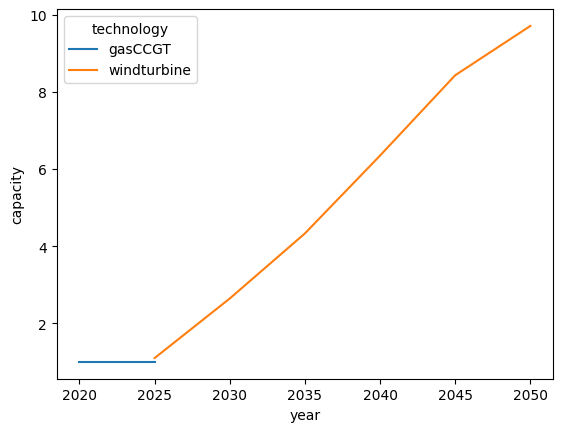

In [46]:
# share with minimum service
mca_capacity = pd.read_csv("Results/MCACapacity.csv")
print (mca_capacity.head())

capacity = mca_capacity[mca_capacity.sector=="power"].groupby(["technology","year"]).sum().reset_index()
sns.lineplot(data=capacity, x='year', y='capacity', hue="technology")

(0.0, 10.0)

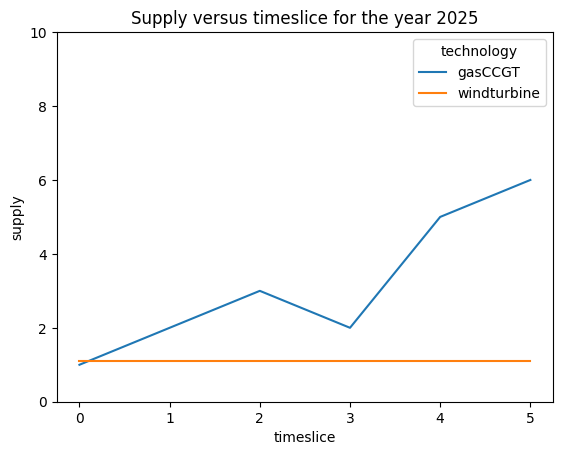

In [59]:
power_supply_2020 = pd.read_csv("Results/Power/Supply_Timeslice/2020.csv")

sns.lineplot(data=power_supply_2020[(power_supply_2020.commodity=="electricity") & (power_supply_2020.year==2025) ], 
hue="technology", x="timeslice", y="supply")
plt.title("Supply versus timeslice for the year 2025")

plt.ylim(0,10)


In [43]:
from pathlib import Path

path = 'Results/Residential/Capacity/'

all_files = Path(path).glob("*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    year_needed = filename.stem
    filtered_year = df[df.year==int(year_needed)]
    li.append(filtered_year)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,asset,year,region,technology,installed,capacity
0,0,2040,R1,gasboiler,2035,0.91
1,1,2040,R1,heatpump,2030,25.00
2,2,2040,R1,heatpump,2035,16.09
3,0,2045,R1,gasboiler,2035,0.91
4,1,2045,R1,heatpump,2035,16.09
5,2,2045,R1,heatpump,2040,31.00
6,2,2050,R1,heatpump,2040,31.00
7,3,2050,R1,heatpump,2045,23.00
8,0,2020,R1,gasboiler,2020,10.00
9,0,2035,R1,gasboiler,2025,4.10


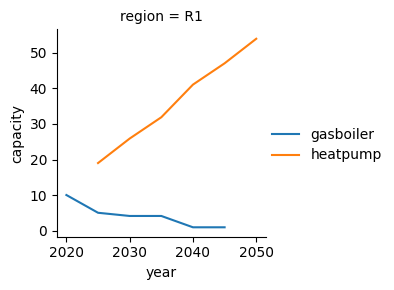

In [44]:
grouped_by = frame.groupby(["year", "technology","region"]).sum().reset_index()
grouped_by

g = sns.FacetGrid(data=grouped_by, row="region")
g.map(sns.lineplot, "year", "capacity", "technology")
g.add_legend()